In [2]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


# Predator Prey
$$
\begin{align*}
 \dot{x} &= ax - bxy,\quad x(0) = x_0\\
 \dot{y} &= cxy - dy,\quad y(0) = y_0
\end{align*}
$$
The transition diagram for an equivalent birth-death process is
$$
\begin{gather*}
N-1
{{ \atop\longrightarrow}\atop{\longleftarrow\atop \epsilon b NM}} 
N
 {{a N \atop\longrightarrow}\atop{\longleftarrow\atop}} 
N+1 \\
M - 1
{{\atop\longrightarrow}\atop{\longleftarrow\atop  dM}} 
M
{{\epsilon c NM \atop\longrightarrow}\atop{\longleftarrow\atop }} 
M+1
\end{gather*}
$$

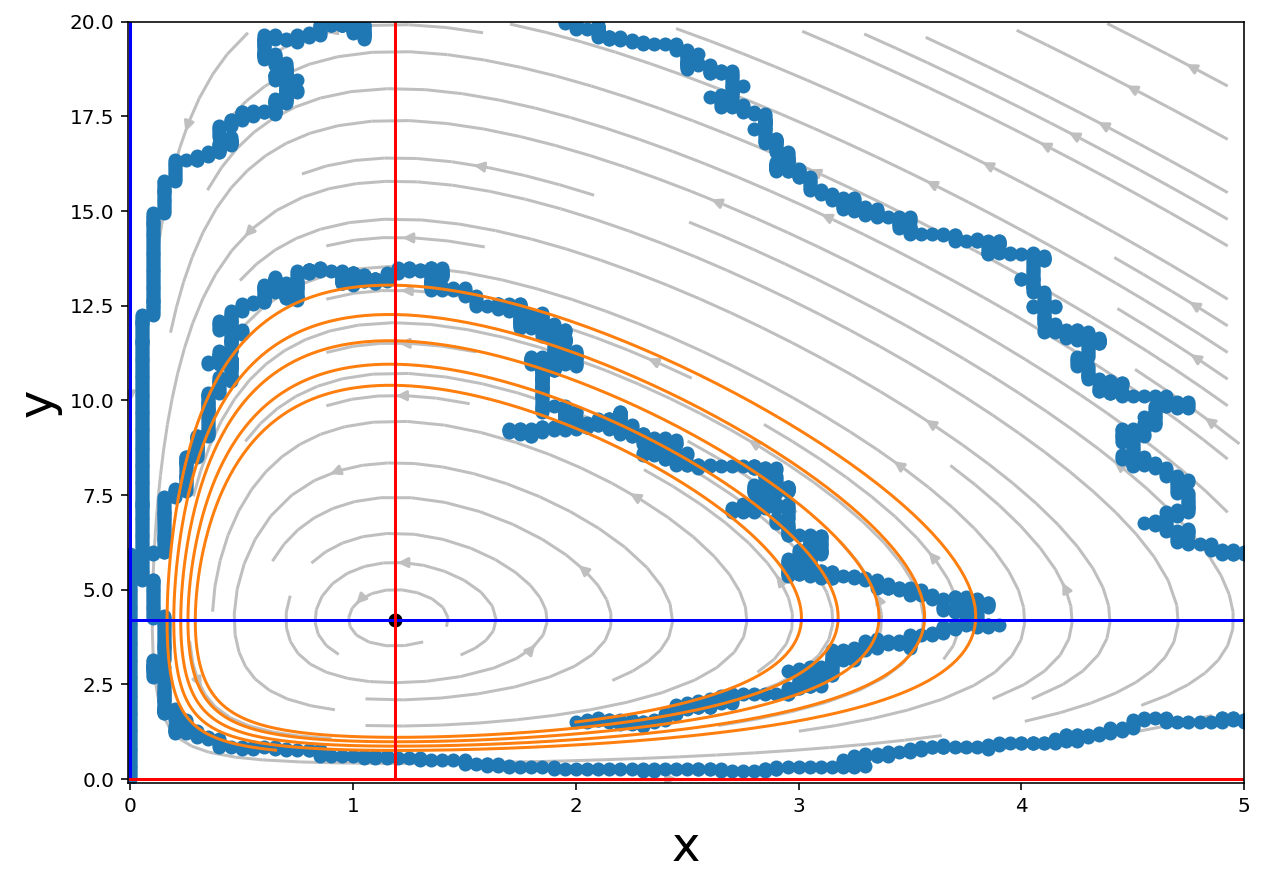

In [42]:
epsilon = 0.05 # TRY CHANGING THIS VALUE
a = 2.1
b = 0.5
c = 1.6
d = 1.9
xhat = d/c
yhat = a/b
# print('(xhat, yhat) = ', (xhat, yhat))
x0 = 2.
y0 = 1.5
n0 = int(x0/epsilon)
m0 = int(y0/epsilon)
Nsteps = 5000
def stochastic_pp(a, b, c, d, epsilon, n0, m0, Nsteps):
    N = zeros(Nsteps)
    N[0] = n0
    M = zeros(Nsteps)
    M[0] = m0
    T = zeros(Nsteps)
    T[0] = 0
    for j in arange(1, Nsteps):
        n = N[j-1]
        m = M[j-1]
        #### There are 4 'arrows' leaving a given state: N-birth, N-death, M-birth, M-death
        combined_rate = a*n + epsilon*b*n*m + epsilon*c*n*m + d*m
        u = rand(1)
        tau = -log(u)/combined_rate
        T[j] = T[j-1] + tau # update time array with new time value
        ## now we make a random variable to decide if birth or death occurs
        ## the order in the vector is N-birth, N-death, M-birth, M-death
        probability_vector = array([a*n, epsilon*b*n*m, epsilon*c*n*m, d*m])/combined_rate
        cummulative_probability_vector = cumsum(probability_vector)
        u2 = rand(1)
        if u2 < cummulative_probability_vector[0]:
            N[j] = N[j-1] + 1 
            M[j] = M[j-1]
        elif u2 < cummulative_probability_vector[1]:
            N[j] = N[j-1] - 1
            M[j] = M[j-1]
        elif u2 < cummulative_probability_vector[2]:
            N[j] = N[j-1]
            M[j] = M[j-1] + 1
        else:
            N[j] = N[j-1]
            M[j] = M[j-1] - 1
        ### check for extinction    
        if M[j] == 0: 
            return T[:j+1], N[:j+1], M[:j+1] # return the solution so far
    return T, N, M
def pp_ode(a, b, c, d, x0, y0, Tmax): # change `Nsteps` to alter
    ### Euler's method parameters
    Delta_t = 0.01 # The size of the time step
    Nsteps = int(Tmax/Delta_t)
    x = zeros(Nsteps) # an array of zeros to store the solution in
    y = zeros(Nsteps)
    x[0] = x0 # store the initial condition
    y[0] = y0
    def f_pp(x, y): # the ligistic growth RHS function
        dxdt = a*x - b*x*y
        dydt = c*x*y - d*y
        return array([dxdt, dydt])
    ####### The simulation loop #########
    for n in arange(1, Nsteps): # loop from n=1 up to n=Nsteps-1
        dx, dy = f_pp(x[n-1], y[n-1])
        x[n] = x[n-1] + Delta_t*dx
        y[n] = y[n-1] + Delta_t*dy
    t = Delta_t*arange(Nsteps)
    return t, x, y

figure(1, [10, 7])

###### Stochastic and ODE trajectories
T, N, M = stochastic_pp(a, b, c, d, epsilon, n0, m0, Nsteps)
Tode, Xode, Yode = pp_ode(a, b, c, d, x0, y0, 2*T[-1])

plot(epsilon*N, epsilon*M, '-o')
plot(Xode, Yode)
plot(xhat, yhat, 'ok')

###### for vector field and phase plane
## x-nullcline
x = linspace(0, 20, 200)
y = a/b*ones(200)
plot(0*x, x, 'b')
plot(x, y, 'b')
## y-nullcline
x = d/c*ones(200)
y = linspace(0, 20, 200)
plot(y, 0*y, 'r')
plot(x, y, 'r')
## vector field
X, Y = meshgrid(linspace(0, 5, 50), linspace(0, 20, 50))
U = a*X - b*X*Y
V = c*X*Y - d*Y
streamplot(X, Y, U, V, color='0.75')


xlim(-0.01, 5)
ylim(-0.1, 20)
xlabel('x', fontsize=24)
ylabel('y', fontsize=24);

# Predator prey with logistic growth
$$
\begin{align*}
 \dot{x} &= ax\left(1 - \frac{x}{K}\right) - bxy,\quad x(0) = x_0\\
 \dot{y} &= cxy - dy,\quad y(0) = y_0
\end{align*}
$$
The transition diagram for an equivalent birth-death process is
$$
\begin{gather*}
N-1
{{ \atop\longrightarrow}\atop{\longleftarrow\atop \epsilon b NM + \epsilon N^2 a/K}} 
N
 {{a N \atop\longrightarrow}\atop{\longleftarrow\atop}} 
N+1 \\
M - 1
{{\atop\longrightarrow}\atop{\longleftarrow\atop  dM}} 
M
{{\epsilon c NM \atop\longrightarrow}\atop{\longleftarrow\atop }} 
M+1
\end{gather*}
$$

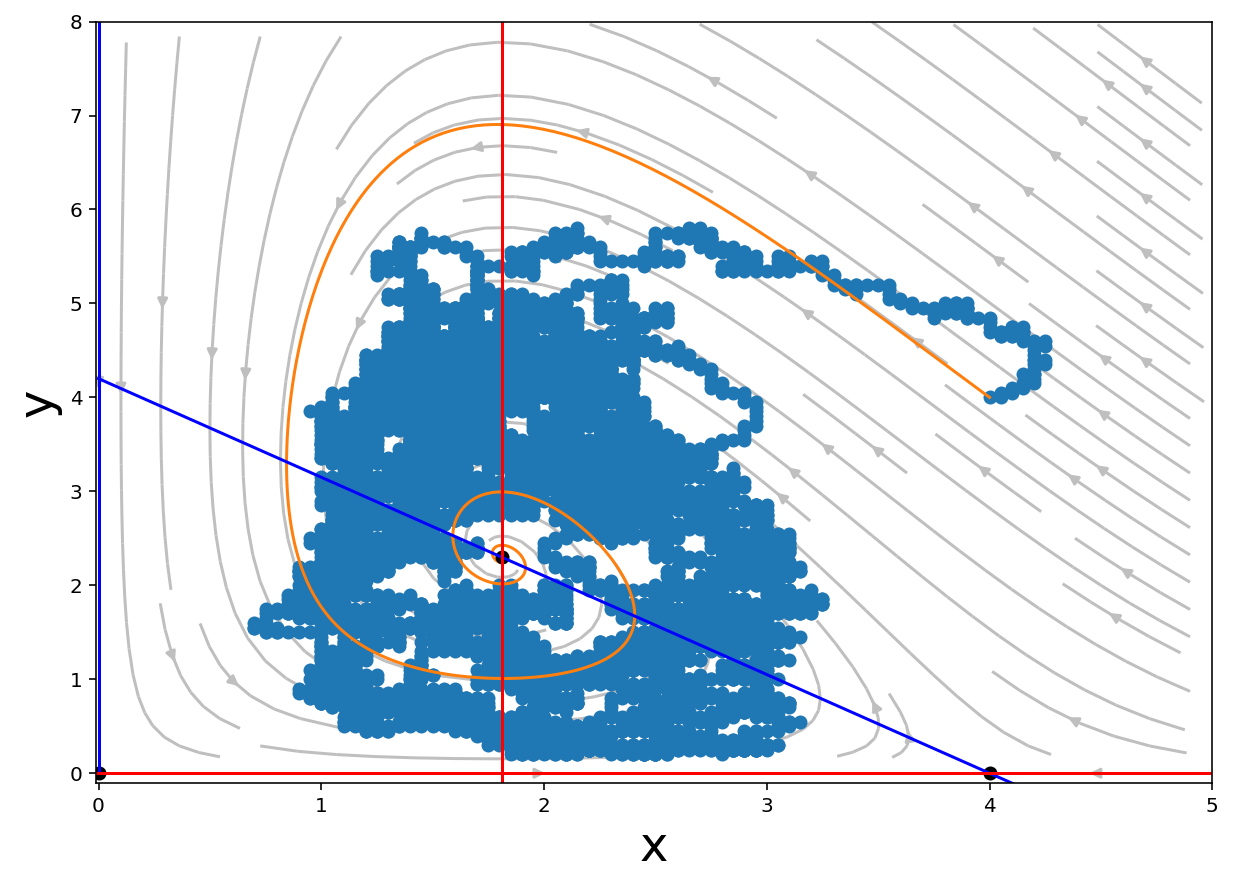

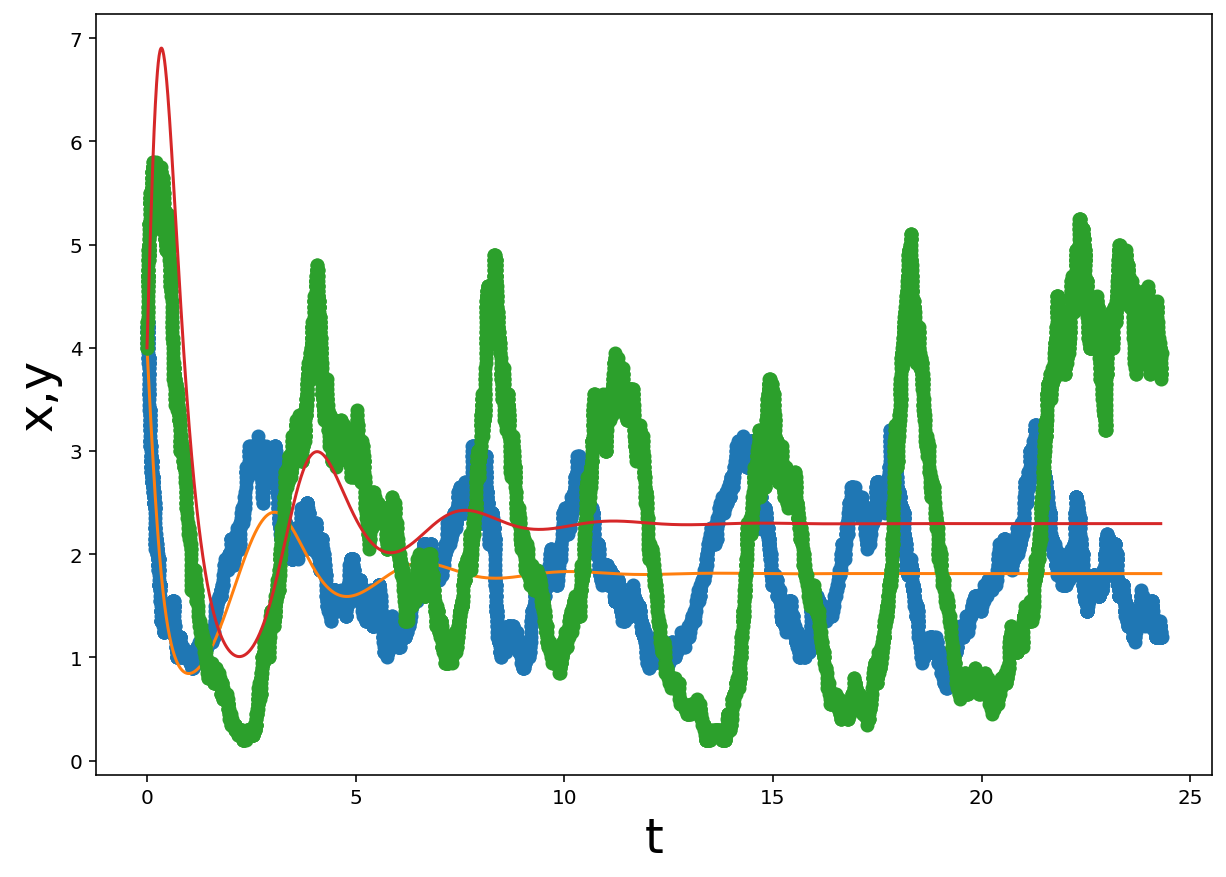

In [133]:
epsilon = 0.05 # TRY CHANGING THIS VALUE
a = 2.1
b = 0.5
c = 1.6
d = 2.9
K = 4
x0 = 4.
y0 = 4.
n0 = int(x0/epsilon)
m0 = int(y0/epsilon)
Nsteps = 10000
def stochastic_pp(a, b, c, d, epsilon, n0, m0, Nsteps):
    N = zeros(Nsteps)
    N[0] = n0
    M = zeros(Nsteps)
    M[0] = m0
    T = zeros(Nsteps)
    T[0] = 0
    for j in arange(1, Nsteps):
        n = N[j-1]
        m = M[j-1]
        #### There are 4 'arrows' leaving a given state: N-birth, N-death, M-birth, M-death
        combined_rate = a*n + epsilon*b*n*m + epsilon*n**2*a/K + epsilon*c*n*m + d*m
        u = rand(1)
        tau = -log(u)/combined_rate
        T[j] = T[j-1] + tau # update time array with new time value
        ## now we make a random variable to decide if birth or death occurs
        ## the order in the vector is N-birth, N-death, M-birth, M-death
        probability_vector = array([a*n, epsilon*b*n*m + epsilon*n**2*a/K, epsilon*c*n*m, d*m])/combined_rate
        cummulative_probability_vector = cumsum(probability_vector)
        u2 = rand(1)
        if u2 < cummulative_probability_vector[0]:
            N[j] = N[j-1] + 1 
            M[j] = M[j-1]
        elif u2 < cummulative_probability_vector[1]:
            N[j] = N[j-1] - 1
            M[j] = M[j-1]
        elif u2 < cummulative_probability_vector[2]:
            N[j] = N[j-1]
            M[j] = M[j-1] + 1
        else:
            N[j] = N[j-1]
            M[j] = M[j-1] - 1
        ### check for extinction    
        #if N[j] == 0 or M[j] == 0: 
        #    return T[:j+1], N[:j+1], M[:j+1] # return the solution so far
    return T, N, M
def pp_ode(a, b, c, d, x0, y0, Tmax): # change `Nsteps` to alter
    ### Euler's method parameters
    Delta_t = 0.01 # The size of the time step
    Nsteps = int(Tmax/Delta_t)
    x = zeros(Nsteps) # an array of zeros to store the solution in
    y = zeros(Nsteps)
    x[0] = x0 # store the initial condition
    y[0] = y0
    def f_pp(x, y): # the ligistic growth RHS function
        dxdt = a*x*(1 - x/K) - b*x*y
        dydt = c*x*y - d*y
        return array([dxdt, dydt])
    ####### The simulation loop #########
    for n in arange(1, Nsteps): # loop from n=1 up to n=Nsteps-1
        dx, dy = f_pp(x[n-1], y[n-1])
        x[n] = x[n-1] + Delta_t*dx
        y[n] = y[n-1] + Delta_t*dy
    t = Delta_t*arange(Nsteps)
    return t, x, y

figure(1, [10, 7])

###### Stochastic and ODE trajectories
T, N, M = stochastic_pp(a, b, c, d, epsilon, n0, m0, Nsteps)
Tode, Xode, Yode = pp_ode(a, b, c, d, x0, y0, T[-1])

## ODE and stochastic trajectories
plot(epsilon*N, epsilon*M, '-o')
plot(Xode, Yode)
## fixed points
xhat = d/c
yhat = a/b*(1 - d/c/K)
plot(xhat, yhat, 'ok') 
plot(0, 0, 'ok')
plot(K, 0, 'ok')

###### for vector field and phase plane
## x-nullcline
x = linspace(0, 8, 200)
plot(0*x, x, 'b')
plot(x, a/b*(1 - x/K), 'b')
## y-nullcline
x = d/c*ones(200)
y = linspace(-0.1, 8, 200)
plot(y, 0*y, 'r')
plot(x, y, 'r')
## vector field
X, Y = meshgrid(linspace(0, 5, 20), linspace(0, 8, 20))
U = a*X*(1 - X/K) - b*X*Y
V = c*X*Y - d*Y
streamplot(X, Y, U, V, color='0.75')


xlim(-0.01, 5)
ylim(-0.1, 8)
xlabel('x', fontsize=24)
ylabel('y', fontsize=24);

figure(2, [10, 7])
plot(T, epsilon*N, '-o')
plot(Tode, Xode)
plot(T, epsilon*M, '-o')
plot(Tode, Yode)

xlabel('t', fontsize=24)
ylabel('x,y', fontsize=24);

# SIR Model
Consider the spread of an infectious disease in a host population.
Let $S(t)$ be the susceptible, $I(t)$ be the infected, and $R(t)$ the recovered populations.
\begin{align*}
  S' &= -\beta I S ,\\
  I' &= \beta I S - \alpha I, \\
  R' &= \alpha I
\end{align*}
where $\beta>0$ is the transmission coefficient and $\alpha >0$ is the recovery rate.
We can ignore the $R$ equation because the equations for $S$ and $I$ do not depend on $R$.
This leaves us with a planar system for $S$ and $I$.
Given the solution $I(t)$ to the planar system, the recovered population is
$$R(t) = \alpha \int_0^t I(t')dt'.$$

### Determine stability in the planar system
The Jacobian matrix is given by
$$
J(S, I) = 
\begin{bmatrix}
 - \beta I & -\beta S \\
 \beta I & \beta S - \alpha
\end{bmatrix}
$$
There is a continuous line of fixed points along $(S, 0)$ where
$$
J(S, 0) = 
\begin{bmatrix}
 0 & -\beta S \\
 0 & \beta S - \alpha
\end{bmatrix}
$$
The eigenvalues are 
$$ \lambda_1 = 0, \qquad \lambda_2 = \beta S - \alpha $$

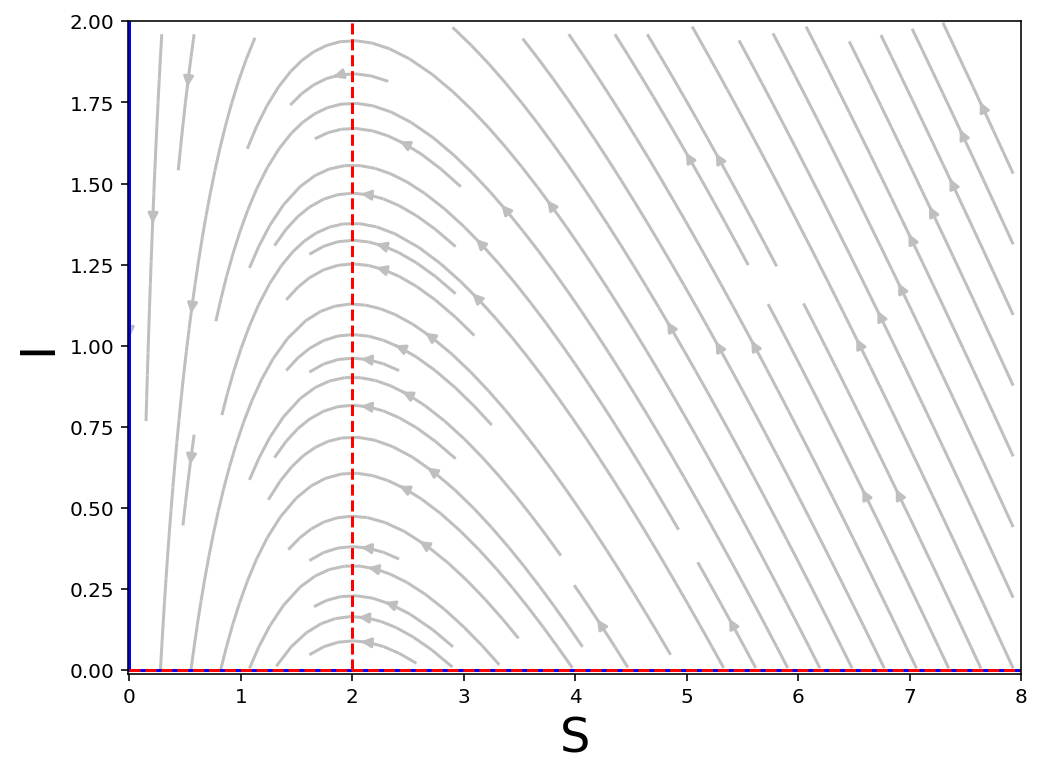

In [5]:
beta = 1
alpha = 2


X, Y = meshgrid(linspace(0, 8, 20), linspace(0, 2, 20))
U = -beta*X*Y
V = beta*X*Y - alpha*Y


figure(1, [8, 6])

# quiver(X, Y, U, V, color='0.5')
streamplot(X, Y, U, V, color='0.75')


x = linspace(0, 8, 200)
plot(x*0, x, 'b')
plot(x, x*0, 'b')
plot(x, x*0, '--r')
plot(alpha/beta*ones(200), x, '--r')
xlim(-0.01, 8)
ylim(-0.01, 2)
xlabel('S', fontsize=24)
ylabel('I', fontsize=24);

# Gene expression system: mutual repressors model: phase plane
\begin{align*}
    \dot{x} &= f(x, y), \\
    \dot{y} &= f(y, x),
              %% b = 0.15
\end{align*}
where
$$
f(x, y) = \frac{b + x^2}{b + x^2 + y^2} - x.
$$
The parameter $b>0$ represents the base rate of expression.


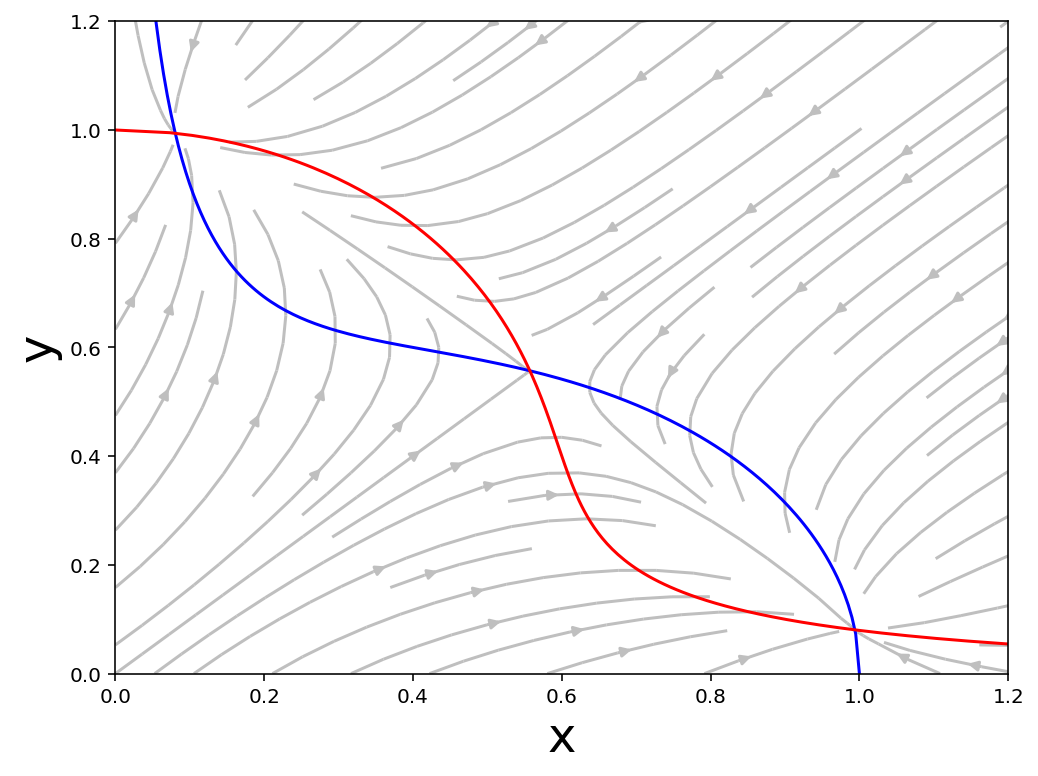

In [6]:
b = 0.08
x = linspace(0.01, 1, 200)
y1 = sqrt((b + x**2)*(1-x)/x)

xv = linspace(0, 1.5, 50)
X, Y = meshgrid(xv, xv)
U = (b + X**2)/(b + X**2 + Y**2) - X
V = (b + Y**2)/(b + Y**2 + X**2) - Y
# U /= sqrt(U**2 + V**2)
# V /= sqrt(U**2 + V**2)

figure(1, [8, 6])

# quiver(X, Y, U, V, color='0.5')
streamplot(X, Y, U, V, color='0.75')

plot(x, y1, 'b')
plot(y1, x, 'r')
xlim(0, 1.2)
ylim(0, 1.2)
xlabel('x', fontsize=24)
ylabel('y', fontsize=24);

## Find the fixed points and the eigenvalues of the Jacobian

In [7]:
from scipy.optimize import root
def F(u):
    x, y = u
    f1 = (b + x**2)/(b + x**2 + y**2) - x
    f2 = (b + y**2)/(b + x**2 + y**2) - y
    return array([f1, f2])
def J(u): ## Jaciobian
    x, y = u
    J = zeros((2, 2))
    J[0, 0] = 2*x/(b + x**2 + y**2) - (b + x**2)*2*x/(b + x**2 + y**2)**2 - 1
    J[0, 1] = - (b + x**2)*2*y/(b + x**2 + y**2)**2
    J[1, 0] = - (b + y**2)*2*x/(b + x**2 + y**2)**2
    J[1, 1] = 2*y/(b + x**2 + y**2) - (b + y**2)*2*y/(b + x**2 + y**2)**2 - 1
    return J
def find_fixedpoint(x0): ### this function finds xhat such that F(xhat) = 0
    sol = root(F, x0, args=(), method='hybr')
    return sol.x

x0 = array([0.01, 0.99]) # make a guess of the fixed point location using the phase plane graph
xhat1 = find_fixedpoint(x0)
x0 = array([0.5, 0.5])
xhat2 = find_fixedpoint(x0)
x0 = array([0.99, 0.01])
xhat3 = find_fixedpoint(x0)

print('fixed point 1:')
print(xhat1)
L1, _ = eig(J(xhat1)) ### this function computes the eigenvalues of the jacobian matrix
print('eigenvalues for fixed point 1:')
print(L1)
print('---------------')

print('fixed point 2:')
print(xhat2)
L2, _ = eig(J(xhat2))
print('eigenvalues for fixed point 2:')
print(L2)
print('---------------')

print('fixed point 3:')
print(xhat3)
L3, _ = eig(J(xhat3))
print('eigenvalues for fixed point 3:')
print(L3)
print('---------------')


fixed point 1:
[0.08048524 0.99397102]
eigenvalues for fixed point 1:
[-0.76373512 -1.08735235]
---------------
fixed point 2:
[0.55708652 0.55708652]
eigenvalues for fixed point 2:
[ 0.5901066  -1.18154731]
---------------
fixed point 3:
[0.99397102 0.08048524]
eigenvalues for fixed point 3:
[-1.08735235 -0.76373512]
---------------


# Fitz-Hugh Nagumo
Let $x$ represent the voltage accross the cell membrane of a neuron, and let $y$ represent the corresponding current. A phenomenological model for the dynamics of $x$ and $y$ is given by
\begin{align}
  \dot{x} &= \frac{1}{\gamma}\left(x(-a - x)(x - a) - y\right) \\
  \dot{y} &= x - x_{c}
\end{align}
At the fixed point, the Jacobian Matrix is
\begin{equation}
J = \frac{1}{\gamma}
  \begin{bmatrix}
    a^2 - 3 x_c^2 & -1 \\
    \gamma & 0 
  \end{bmatrix}
\end{equation}
We have
\begin{equation}
{\rm Tr}(J) = \frac{a^2 - 3 x_c^2}{\gamma}, \quad
\vert J \vert = \frac{1}{\gamma}
\end{equation}
The eigenvalues are
\begin{equation}
  \lambda_{\pm} = \frac{1}{2\gamma}\left[a^2 - 3x_c^2 \pm \sqrt{\left(a^2 - 3x_c^2\right)^2 - 4\gamma}\right]
\end{equation}
The value of $x_c$ that causes a change in stability is 
$$ x_c = \pm \frac{a}{\sqrt{3}}$$

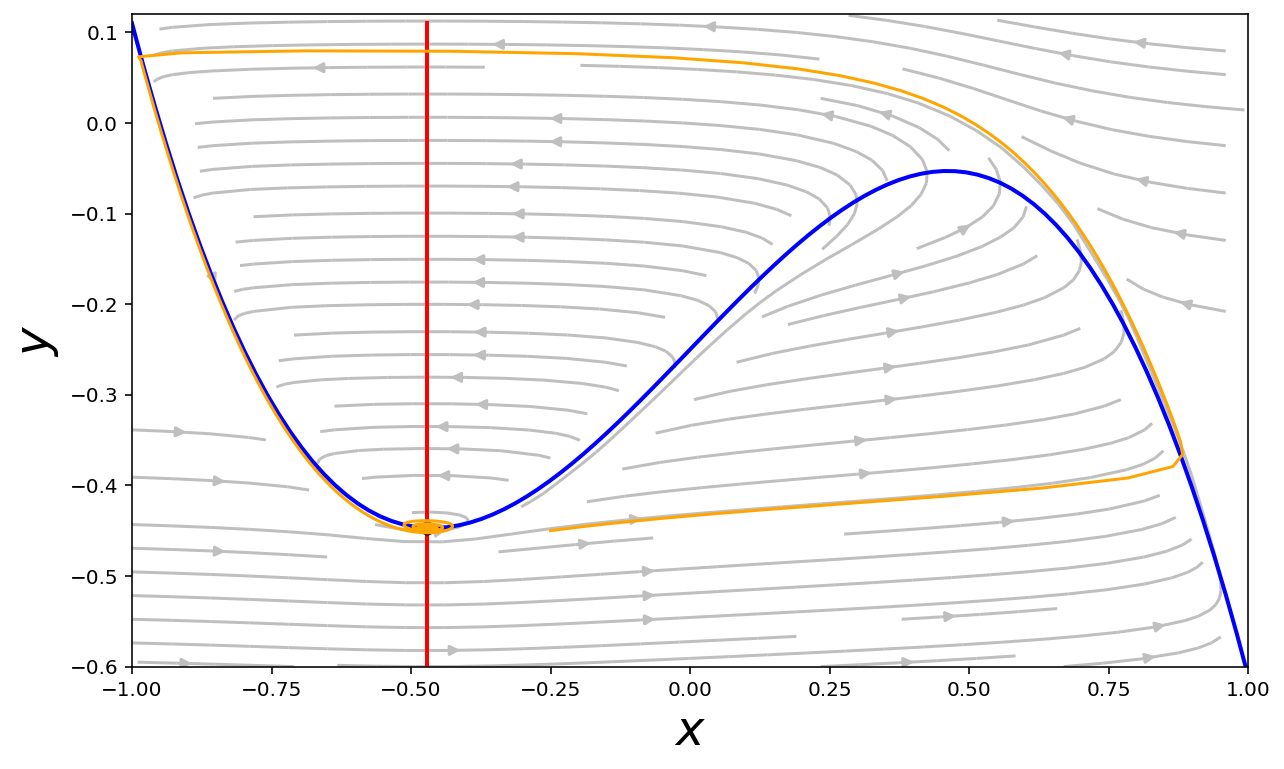

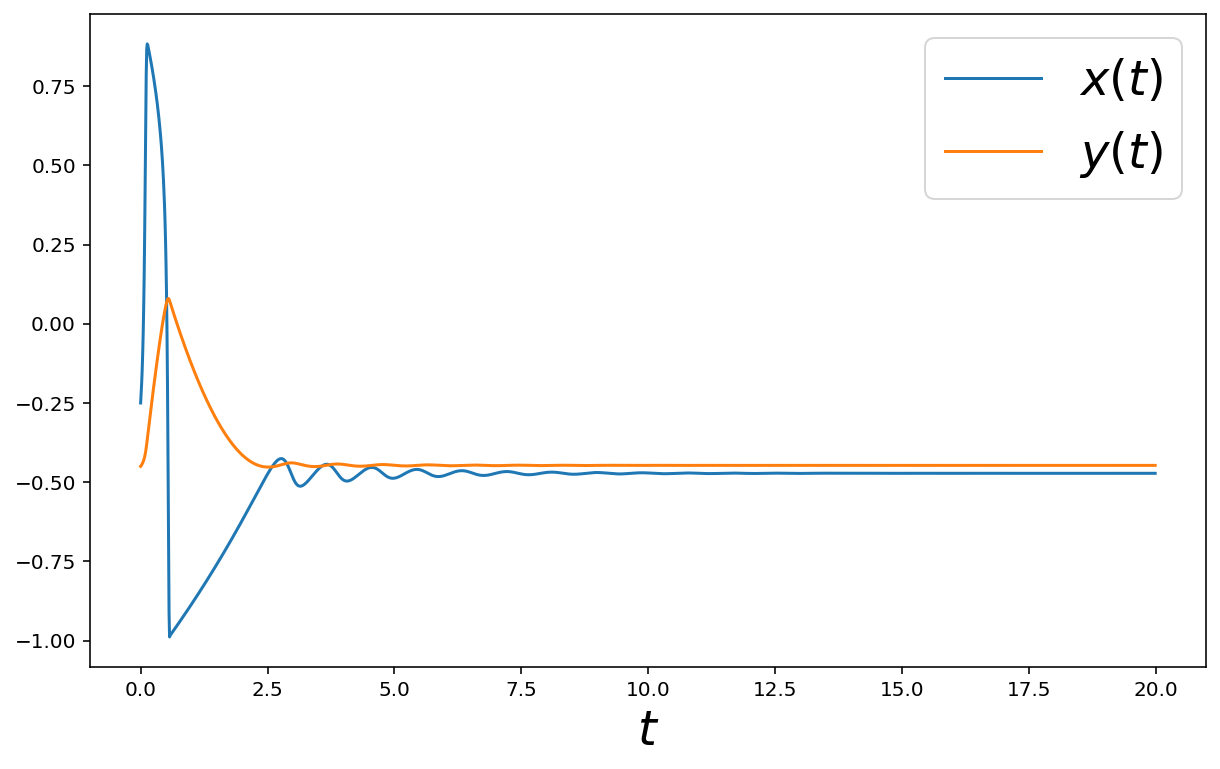

In [8]:
xc = -0.8/sqrt(3.) - 0.01
I = -0.25
gamma = 0.02
a = 0.8
def fhn_ode(I, xc, gamma, a, x0, y0, Tmax): # change `Nsteps` to alter
    ### Euler's method parameters
    Delta_t = 0.01 # The size of the time step
    Nsteps = int(Tmax/Delta_t)
    x = zeros(Nsteps) # an array of zeros to store the solution in
    y = zeros(Nsteps)
    x[0] = x0 # store the initial condition
    y[0] = y0
    def f_pp(x, y): # the ligistic growth RHS function
        dxdt = (x*(-a - x)*(x - a) - y + I)/gamma
        dydt = x - xc
        return array([dxdt, dydt])
    ####### The simulation loop #########
    for n in arange(1, Nsteps): # loop from n=1 up to n=Nsteps-1
        dx, dy = f_pp(x[n-1], y[n-1])
        x[n] = x[n-1] + Delta_t*dx
        y[n] = y[n-1] + Delta_t*dy
    t = Delta_t*arange(Nsteps)
    return t, x, y

x0 = -0.25
y0 = -0.45
Tode, Xode, Yode = fhn_ode(I, xc, gamma, a, x0, y0, 20)


X, Y = meshgrid(linspace(-1, 1, 20), linspace(-0.6, 0.12, 20))
U = (X*(-a - X)*(X - a) - Y + I)/gamma
V = X - xc


figure(1, [10, 6])

#### vector field
# quiver(X, Y, U, V, color='0.5')
streamplot(X, Y, U, V, color='0.75')
#### nullclines
x = linspace(-1, 1, 100)
y = x*(-a - x)*(x - a) + I
plot(x, y, 'b', lw=2, label='$\dot{x}=0$')
plot(xc*ones(100), y, 'r', lw=2, label='$\dot{y}=0$')
#### fixed point
plot(xc, xc*(-a - xc)*(xc - a) + I, 'ko')
#### Euler's method solution
plot(Xode, Yode, 'orange')

ylim(-0.6, 0.12)
xlabel('$x$', fontsize=24)
ylabel('$y$', fontsize=24)
# legend(fontsize=24);


#### x vs t and y vs t
figure(2, [10, 6])
plot(Tode, Xode, label='$x(t)$')
plot(Tode, Yode, label='$y(t)$')
xlabel('$t$', fontsize=24)
legend(fontsize=24);